In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rdkit.Chem as rdc
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import mean_squared_error

Example for height and weight from Howell data 

In [38]:
df = pd.read_csv("./data/howell1.txt")#, names=["height", "weight", "age", "male"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


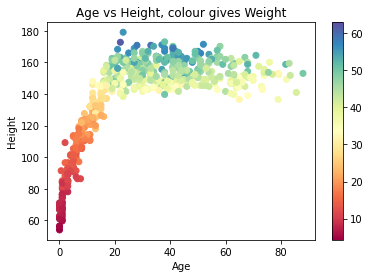

In [39]:
X = np.array(df["height"], df["weight"])
y_norm = df["weight"]
fig = plt.figure()
ax = fig.add_subplot(111)
pt = plt.scatter(df["age"],df["height"], c=y_norm, cmap=plt.cm.Spectral)
plt.colorbar(pt); plt.title("Age vs Height, colour gives Weight"); plt.xlabel("Age"); plt.ylabel("Height")
plt.savefig("./images/height_age")

In [40]:
x1 = np.array(df["age"]).reshape(-1,1); x2 =  np.array(df["height"]).reshape(-1,1)
X = np.concatenate([x1,x2], axis=1)
y = np.array(df["weight"])
print(X.shape, y.shape)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = 1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

(544, 2) (544,)


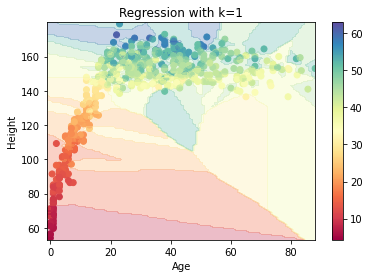

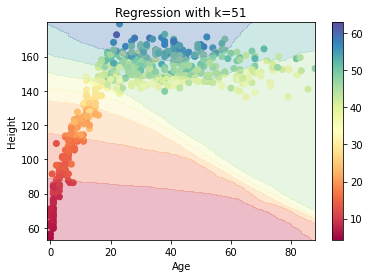

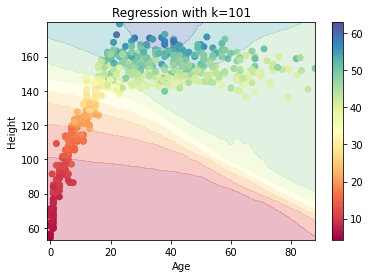

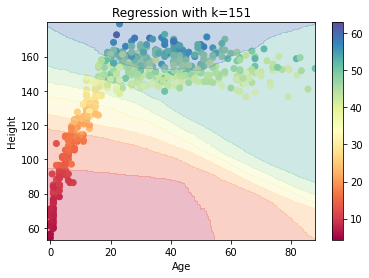

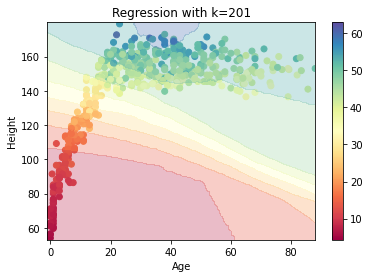

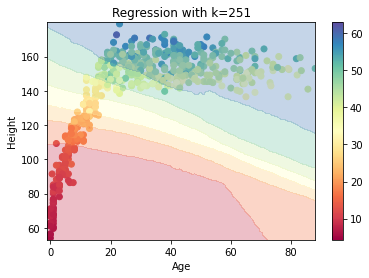

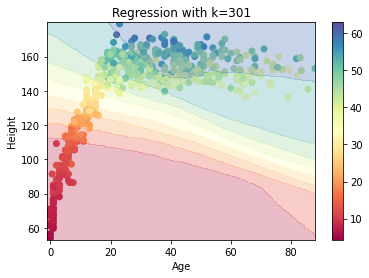

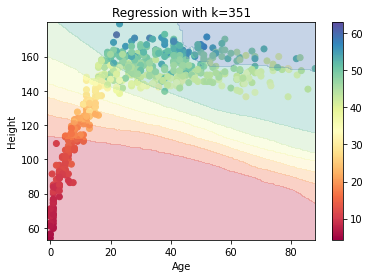

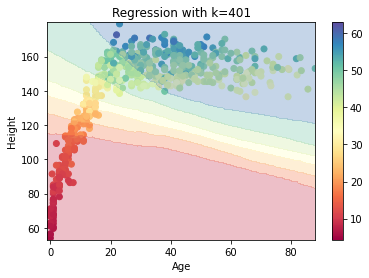

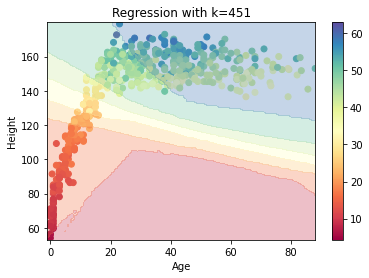

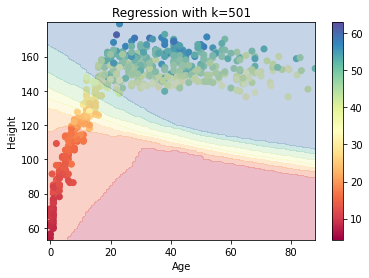

In [41]:

for k in range(1, 544, 50):
    plt.figure()
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X,y)
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pt = plt.scatter(df["age"],df["height"], c=y_norm, cmap=plt.cm.Spectral)
    CS = plt.contourf(xx, yy, Z, alpha = .3, cmap=plt.cm.Spectral)
    plt.colorbar(pt); plt.title("Age vs Height, colour gives Weight"); plt.xlabel("Age"); plt.ylabel("Height")
    plt.title("Regression with k=%d" %k)
    fname = "./images/knn_reg_hw_k%d" %k
    plt.savefig(fname)
    plt.show()

Weighted KNN

In [42]:
def inv_weight(dist):
    return 1/(1+dist)

def sub_weight(dist):
    z = np.zeros(dist.shape)
    m = 50-dist
    return np.maximum(z, m)

def gauss_weight(dist):
    return np.exp(1*-(dist**2)/2)

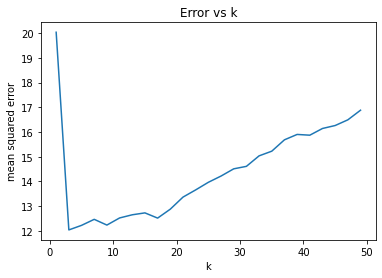

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
errs = []
k_range = range(1,50,2)
for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_est = neigh.predict(X_test)
    y_est = y_est.reshape(-1, 1)
    err = mean_squared_error(y_est, y_test)
    errs.append(err)
plt.plot(k_range, errs); plt.title("Error vs k"); plt.xlabel("k"); plt.ylabel("mean squared error");
plt.savefig("error_kreg")

In [44]:
print(X.shape, y.shape)
weighs = [None, inv_weight, sub_weight, gauss_weight]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
weight_errs = []
X_train = X_train.reshape(-1, 2)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 2)
y_test = y_test.reshape(-1, 1)
print(X_test.shape, y_test.shape)

(544, 2) (544,)
(180, 2) (180, 1)


In [45]:
weight_errs=[]
k_range = range(1,30,2)
for func in weighs:
    errs = []
    for k in k_range:
        neigh = KNeighborsRegressor(n_neighbors=k, weights=func)
        neigh.fit(X_train, y_train)
        y_est = neigh.predict(X_test)
        y_est = y_est.reshape(-1, 1)
        err = mean_squared_error(y_est, y_test)
        errs.append(err)
    weight_errs.append(errs)

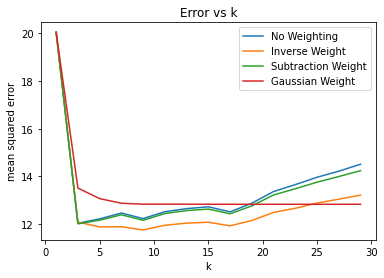

In [36]:
plt.figure(); plt.title("Error vs k"); plt.xlabel("k"); plt.ylabel("mean squared error");
labels = ["No Weighting","Inverse Weight", "Subtraction Weight", "Gaussian Weight"]
for i in range(len(weighs)):
    plt.plot(k_range, weight_errs[i], label=labels[i]); 
plt.legend()
plt.savefig("./images/error_kreg_hweigh")

Now do this for Huuskonen

In [19]:
df = pd.read_csv("./data/Huuskonen.csv")
df

,0,Compound_Identifier,Source,SMILES,LogS.M.,MW,AMW,Sv,Se,Sp,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50\r\r\n
0,1,HU_100,Huuskonen,c1ccc2ccc3nccnc3c2c1,-2.68,180.22,8.192,15.623,21.854,16.296,...,0,0,0,0,1,0,1,0,1,0
1,2,HU_1000,Huuskonen,c1cnc2c(C)ncnc2n1,-0.12,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0
2,3,HU_1001,Huuskonen,c1cnc2cnc(C)nc2n1,-0.47,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0
3,4,HU_1002,Huuskonen,c1c(C)nc2cncnc2n1,0.06,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0
4,5,HU_1003,Huuskonen,c1cnc2c(OC)ncnc2n1,-1.11,162.17,9.009,12.327,18.618,12.239,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,928,HU_T2_5,Huuskonen,c1ccccc1N2C(=O)C=C(C)N2C,-0.56,188.25,7.240,16.392,25.949,17.273,...,0,0,0,0,1,0,1,0,1,0
928,929,HU_T2_6,Huuskonen,n(c(nc(n1)NC(C)C)NCC)c1Cl,-3.85,215.72,7.704,16.569,28.251,17.693,...,0,0,1,0,1,0,1,0,1,0
929,930,HU_T2_7,Huuskonen,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,-2.34,232.26,8.009,18.821,29.604,19.182,...,0,0,1,0,1,1,1,0,1,0
930,931,HU_T2_8,Huuskonen,O=C(N(C)C)Nc(ccc(c1Cl)Cl)c1,-3.80,233.11,9.713,16.047,24.596,16.989,...,0,0,0,0,1,0,1,0,1,0


In [20]:
df = df.drop(["Compound_Identifier", "Source", "0"], axis=1)

In [21]:
ydf = df["LogS.M."]
x_smiles = df["SMILES"]


In [22]:
df.shape

(932, 2258)

In [23]:
df.dropna()
df.shape

(932, 2258)

Regression with KNN

df


In [7]:
dfx = df.drop(["SMILES"], axis=1)

In [8]:
X = dfx
y = ydf

X_train, X_test, y_train, y_test = train_test_split(X, y)



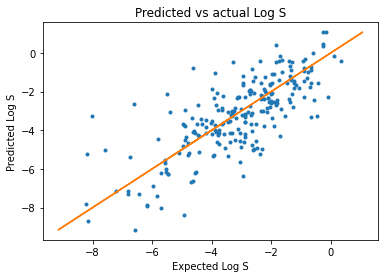

In [9]:

clr = KNeighborsRegressor()
clr.fit(X_train, y_train)
yhat = clr.predict(X_test)
plt.plot(yhat, y_test, '.', label="Predicted")
plt.plot(y_test, y_test, label="Exact Match")
plt.xlabel("Expected Log S")
plt.ylabel("Predicted Log S")
plt.title("Predicted vs actual Log S");

Weighted KNN

In [ ]:
def inv_weight(dist):
    return 1/(1+dist)

def sub_weight(dist):
    z = np.zeros(dist.shape)
    m = 50-dist
    return np.maximum(z, m)

def gauss_weight(dist):
    return np.exp(1*-(dist**2)/2)

In [32]:
weight_errs=[]
k_range = range(1,30,2)
for func in weighs:
    errs = []
    for k in k_range:
        neigh = KNeighborsRegressor(n_neighbors=k, weights=func)
        neigh.fit(X_train, y_train)
        y_est = neigh.predict(X_test)
        y_est = y_est.reshape(-1, 1)
        err = mean_squared_error(y_est, y_test)
        errs.append(err)
    weight_errs.append(errs)

(544, 2) (544,)
(180, 2) (180, 1)


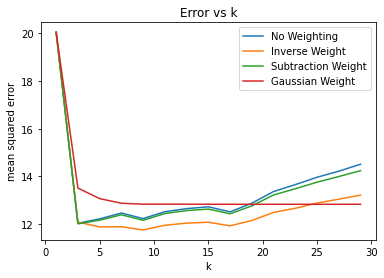

In [31]:
plt.figure(); plt.title("Error vs k"); plt.xlabel("k"); plt.ylabel("mean squared error");
labels = ["No Weighting","Inverse Weight", "Subtraction Weight", "Gaussian Weight"]
for i in range(len(weighs)):
    plt.plot(k_range, weight_errs[i], label=labels[i]); 
plt.legend()
plt.savefig("./images/error_kreg_hweigh")

In [75]:

#Now using k means, cluster the molecules using the features

# assigns a label to each molecule
clr = KMeans(n_init='auto')
clr.fit(X_train)
print(clr.labels_)
print(np.unique(clr.labels_))

[7 1 1 1 1 1 7 0 1 1 7 1 1 1 1 7 7 1 1 6 7 7 6 1 1 1 1 1 7 7 1 7 7 0 1 1 1
 0 7 1 1 1 1 7 1 1 1 1 1 1 7 4 7 1 1 4 1 1 7 2 7 1 1 6 1 1 7 0 0 1 1 6 1 1
 7 4 4 7 1 6 7 4 1 1 1 0 0 4 1 7 7 7 7 1 1 1 3 1 7 4 1 7 1 1 1 7 1 7 6 0 1
 0 4 7 0 1 1 1 1 1 1 1 7 1 1 0 1 1 1 4 7 7 7 7 1 7 1 1 1 7 1 7 1 1 1 7 1 4
 7 1 1 3 1 4 1 6 1 1 1 1 1 1 1 7 1 7 1 1 1 1 1 1 4 1 1 7 1 1 4 1 0 4 1 3 1
 1 1 7 6 7 1 7 1 1 4 7 7 1 1 7 1 7 7 4 6 7 1 4 1 1 4 1 0 4 7 1 4 0 6 1 7 4
 7 1 7 0 1 1 1 1 1 1 1 7 7 1 1 1 5 7 7 4 1 1 0 7 1 1 1 1 4 7 4 3 1 0 1 1 4
 1 1 7 4 1 1 7 1 1 1 0 1 1 7 1 1 1 7 1 6 7 4 1 4 7 1 1 1 7 7 1 1 1 7 1 1 0
 1 7 1 7 4 1 7 1 7 1 7 0 0 4 1 7 1 0 4 7 7 7 1 1 7 1 1 1 1 1 4 4 1 5 1 3 7
 7 3 1 7 3 1 4 7 1 1 7 7 7 1 7 0 1 1 7 7 1 1 1 1 1 1 7 1 6 7 6 0 1 6 1 1 1
 1 7 1 7 1 1 1 1 1 4 4 1 1 1 4 1 4 1 7 7 1 3 4 1 0 4 6 7 4 1 1 1 1 1 1 7 4
 1 1 0 7 7 1 1 1 4 1 1 0 7 7 1 1 7 0 1 1 1 1 1 1 7 4 1 1 4 7 1 1 1 1 7 1 4
 4 1 1 7 1 1 7 1 6 7 7 1 1 1 1 1 1 1 7 4 1 7 4 1 1 1 4 1 3 6 7 1 7 1 7 1 1
 1 1 7 7 7 1 1 4 1 0 1 7 

Every time you run it you get a different result.. it is initiallised randomly so will give different results each time. 

In [77]:
#iterate over the clusters to see what the average solutbility is in each cluster, and how many members are in it

def get_means_stds(labels, y):
    """
    function to get list of means and standard 
    deviations and length of list
    """
    means, stds, lens = [], [], []
    # get unique labels
    clusts = np.unique(labels)
    # print(clusts)
    for c in clusts:
        inds = np.where(labels==c)[0]
        # get solubilities for that cluster
        sols = y.iloc[inds]
        # calcualte means and standard deviations
        m, s = round(np.mean(sols), 2), round(np.std(sols), 2)
        lens.append(len(inds))
        means.append(m)
        stds.append(s)
    return means, stds, lens

means, stds, lens = get_means_stds(clr.labels_, y_train)

def print_clusts(means, stds, lens):
    print (f"{len(means)} Clusters have: \n\tLengths {lens} \n\tMeans {means} \n\tStandard deviations {stds}")

print_clusts(means, stds, lens)

8 Clusters have: 
	Lengths [35, 383, 1, 14, 62, 5, 25, 174] 
	Means [-4.83, -2.21, -3.32, -3.72, -4.86, -5.58, -3.85, -4.3] 
	Standard deviations [1.6, 1.54, 0.0, 1.53, 2.15, 2.26, 1.36, 1.98]


So some of the clusters are more useful than others. 
We can experiment with different numbers of clusters. 

In [78]:


for n_clusters in range(1, 20):
    clr = KMeans(n_clusters=n_clusters, n_init='auto')
    clr.fit(X_train)
    means, stds, lens = get_means_stds(clr.labels_, y_train)
    print_clusts(means, stds, lens)
    
    
    

1 Clusters have: 
	Lengths [699] 
	Means [-3.21] 
	Standard deviations [2.06]
2 Clusters have: 
	Lengths [60, 639] 
	Means [-4.45, -3.1] 
	Standard deviations [1.83, 2.04]
3 Clusters have: 
	Lengths [498, 41, 160] 
	Means [-2.65, -4.06, -4.74] 
	Standard deviations [1.81, 1.68, 2.01]
4 Clusters have: 
	Lengths [498, 41, 1, 159] 
	Means [-2.65, -4.06, -3.32, -4.75] 
	Standard deviations [1.81, 1.68, 0.0, 2.02]
5 Clusters have: 
	Lengths [473, 5, 49, 1, 171] 
	Means [-2.56, -5.58, -4.29, -3.32, -4.66] 
	Standard deviations [1.72, 2.26, 1.8, 0.0, 2.05]
6 Clusters have: 
	Lengths [82, 386, 17, 4, 172, 38] 
	Means [-4.68, -2.23, -3.82, -5.62, -4.31, -4.59] 
	Standard deviations [1.96, 1.55, 1.4, 2.63, 1.98, 1.78]
7 Clusters have: 
	Lengths [472, 43, 3, 163, 3, 1, 14] 
	Means [-2.56, -4.49, -6.39, -4.66, -2.12, -3.32, -4.18] 
	Standard deviations [1.73, 1.71, 2.62, 2.1, 2.1, 0.0, 0.83]
8 Clusters have: 
	Lengths [15, 395, 43, 1, 5, 173, 64, 3] 
	Means [-4.16, -2.25, -4.41, -3.32, -5.58, -4.4

We will always want the highest variance in the means, and the lowest standard deviations, and a low vaariance in length would also be good

In [79]:
av_means, av_stds, av_lens = [], [], []
for n_clusters in range(1, 20):
    ms, ss, ls = [],[],[]
    for trial in range(20):
        clr = KMeans(n_clusters=n_clusters, n_init='auto')
        clr.fit(X_train)
        means, stds, lens = get_means_stds(clr.labels_, y_train)
        ms.append(np.std(means))
        ss.append(np.sum(stds)/n_clusters)
        ls.append(np.std(lens))
    av_means.append(np.mean(ms))
    av_stds.append(np.mean(stds))
    av_lens.append(np.mean(lens))


    

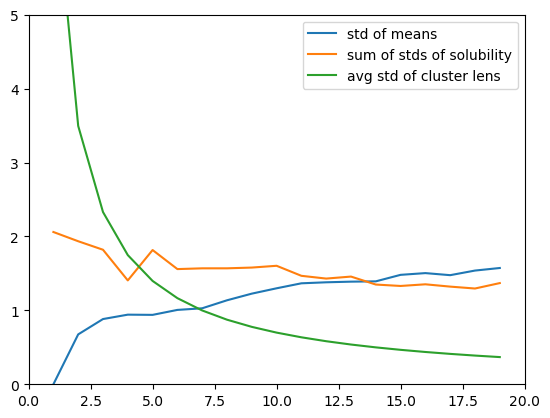

In [80]:

plt.plot(range(1,20), av_means, label="std of means")
plt.plot(range(1,20), av_stds, label="sum of stds of solubility")    
plt.plot(range(1,20), np.array(av_lens)/100, label="avg std of cluster lens")

plt.xlim((0,20))
plt.ylim((0,5))
plt.legend();

Can we sample molecules in each cluster?
lets use 10 clusters

In [ ]:
clr = KMeans(n_clusters=10, n_init='auto')
clr.fit(X_train)
clusters = np.unique(clr.labels_)

for clust in clusters:
    rdc.MolFromSmiles

In [15]:

def fp_from_smiles(smiles):
    """
    takes in a smiles returns a fingerprint vector
    """
    mol = rdc.MolFromSmiles(smiles)
    # generate MF as bit vector
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) 
    # convert bit vector to 1d numpy array
    fp = np.frombuffer(fp.ToBitString().encode(), 'u1') - ord('0') 
    return fp

In [16]:
for smile in x_smiles:
    fp = fp_from_smiles(smile)
    
    break

0.01123046875 2048
